In [ ]:
# install pycaret
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 26.9 MB/s et

In [ ]:
# import libraries
import pandas as pd
import numpy as np# read csv data
data = pd.read_csv('https://raw.githubusercontent.com/srees1988/predict-churn-py/main/customer_churn_data.csv')

data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# check data dimensions
data.shape


(7043, 21)

In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# replace blanks with np.nan
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)


In [ ]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
customerID,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


In [ ]:
# convert to float64
data['TotalCharges'] = data['TotalCharges'].astype('float64')


In [ ]:
import plotly.express as px

fig = px.scatter(x=data['tenure'], y=data['TotalCharges'],
                 color = data['Churn'], template = 'presentation',
                 opacity = 0.5, facet_col = data['Contract'],
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Total Charges $'})

fig.show()


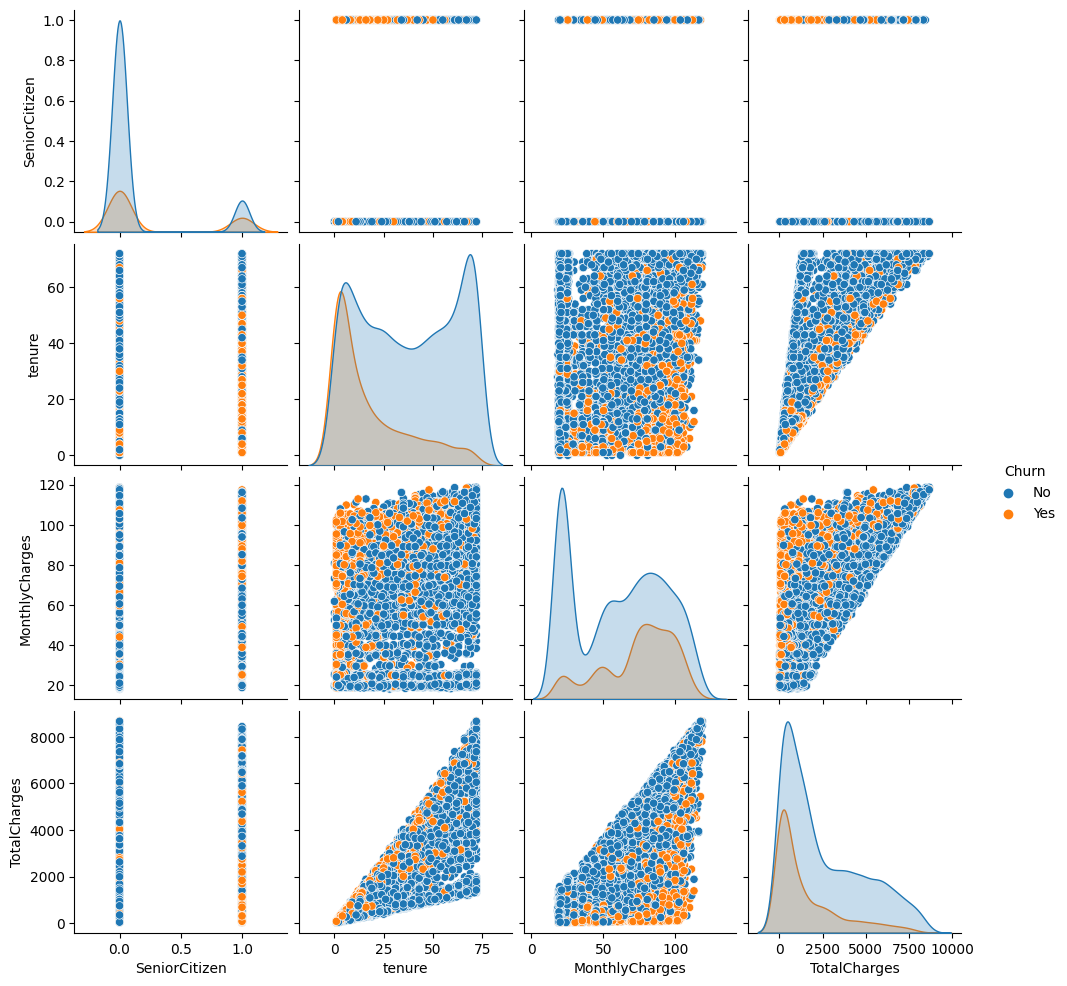

In [ ]:
from matplotlib import colors
#To see a pair plot of all combinations of variables
# importing packages
import seaborn
import matplotlib.pyplot as plt
# pairplot with hue Chrun
seaborn.pairplot(data, hue ='Churn')
# to show
plt.show()

In [ ]:
# check missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# init setup
from pycaret.classification import *
s = setup(data, target = 'Churn', ignore_features = ['customerID'])


,Description,Value
0,Session id,5119
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Ordinal features,5


In [ ]:
# compare all models
best_model = compare_models(sort='AUC')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8030,0.8382,0.5191,0.6689,0.5834,0.4572,0.4642,0.6440
gbc,Gradient Boosting Classifier,0.7998,0.8381,0.5092,0.6618,0.5748,0.4467,0.4538,1.4260
lr,Logistic Regression,0.8010,0.8376,0.5328,0.6556,0.5869,0.4578,0.4627,0.4690
lda,Linear Discriminant Analysis,0.7959,0.8297,0.5420,0.6377,0.5849,0.4510,0.4543,0.3430
lightgbm,Light Gradient Boosting Machine,0.7968,0.8274,0.5229,0.6465,0.5773,0.4456,0.4505,0.5640
qda,Quadratic Discriminant Analysis,0.6826,0.8186,0.8242,0.4476,0.5792,0.3589,0.4038,0.5850
rf,Random Forest Classifier,0.7878,0.8157,0.4832,0.6332,0.5473,0.4121,0.4190,0.9830
nb,Naive Bayes,0.6811,0.8116,0.8394,0.4474,0.5832,0.3623,0.4099,0.3770
xgboost,Extreme Gradient Boosting,0.7815,0.8099,0.5000,0.6092,0.5483,0.4062,0.4102,0.5550
et,Extra Trees Classifier,0.7734,0.7866,0.4809,0.5917,0.5297,0.3827,0.3868,1.0830


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# print best_model parameters
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=5119)


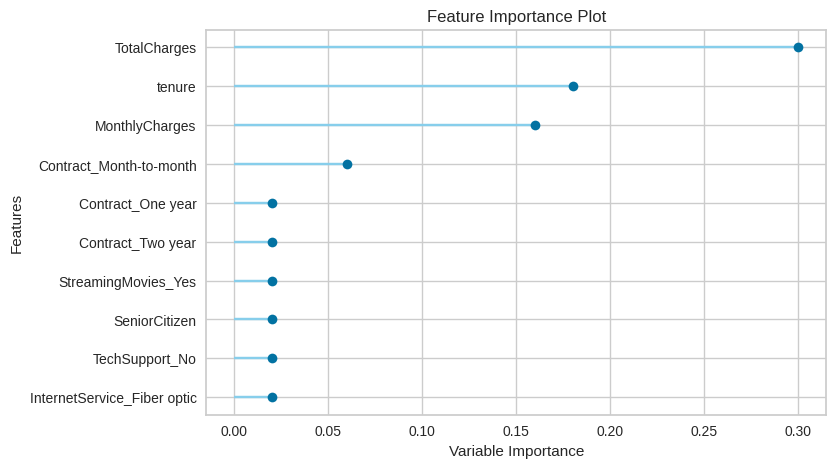

In [ ]:
# Feature Importance Plot
plot_model(best_model, plot = 'feature')

In [ ]:
# tune the best model
tuned_best_model = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7789,0.8298,0.5077,0.5946,0.5477,0.4026,0.4048
1,0.8296,0.8616,0.5000,0.7738,0.6075,0.5050,0.5247
2,0.8032,0.8179,0.5267,0.6635,0.5872,0.4603,0.4656
3,0.7830,0.8368,0.4885,0.6154,0.5447,0.4047,0.4093
4,0.7992,0.8290,0.5267,0.6509,0.5823,0.4520,0.4564
5,0.8114,0.8360,0.5420,0.6827,0.6043,0.4826,0.4881
6,0.7850,0.8349,0.4962,0.6190,0.5508,0.4118,0.4161
7,0.7992,0.8522,0.4962,0.6633,0.5677,0.4404,0.4483
8,0.8134,0.8297,0.4809,0.7241,0.5780,0.4644,0.4804


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


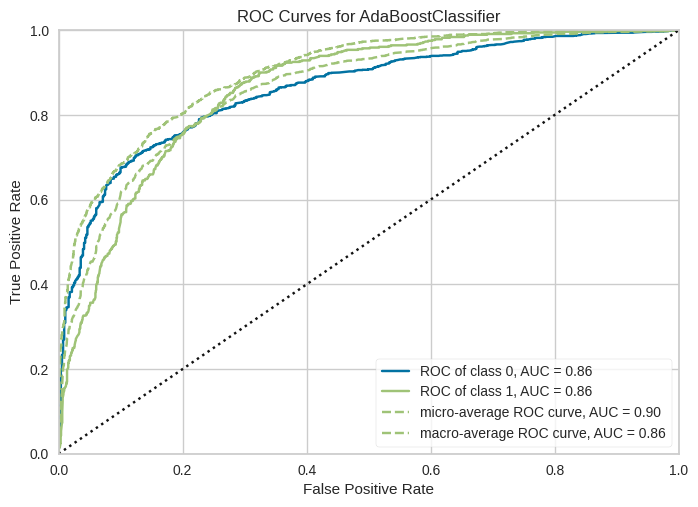

In [ ]:
# Analyse the AUC Plot
plot_model(tuned_best_model, plot = 'auc')


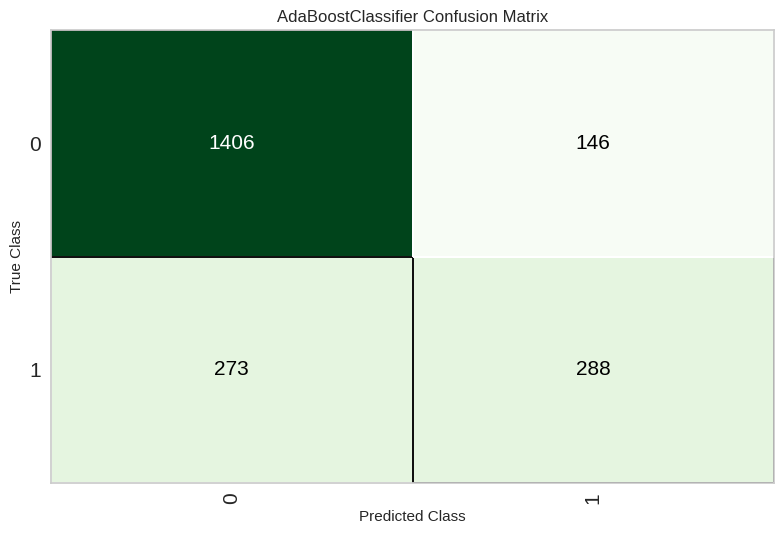

In [ ]:
# Analyse the Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')


In [ ]:
# compare all models
best_model = compare_models(sort='Recall')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6811,0.8116,0.8394,0.4474,0.5832,0.3623,0.4099,0.3320
qda,Quadratic Discriminant Analysis,0.6826,0.8186,0.8242,0.4476,0.5792,0.3589,0.4038,0.4110
lda,Linear Discriminant Analysis,0.7959,0.8297,0.5420,0.6377,0.5849,0.4510,0.4543,0.3610
lr,Logistic Regression,0.8010,0.8376,0.5328,0.6556,0.5869,0.4578,0.4627,0.5380
lightgbm,Light Gradient Boosting Machine,0.7968,0.8274,0.5229,0.6465,0.5773,0.4456,0.4505,1.3030
ada,Ada Boost Classifier,0.8030,0.8382,0.5191,0.6689,0.5834,0.4572,0.4642,0.5750
gbc,Gradient Boosting Classifier,0.7998,0.8381,0.5092,0.6618,0.5748,0.4467,0.4538,1.4450
dt,Decision Tree Classifier,0.7272,0.6575,0.5084,0.4858,0.4958,0.3093,0.3100,0.5910
ridge,Ridge Classifier,0.8000,0.0000,0.5054,0.6631,0.5728,0.4454,0.4529,0.3010
xgboost,Extreme Gradient Boosting,0.7815,0.8099,0.5000,0.6092,0.5483,0.4062,0.4102,0.4440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# print best_model parameters
print(best_model)

GaussianNB(priors=None, var_smoothing=1e-09)


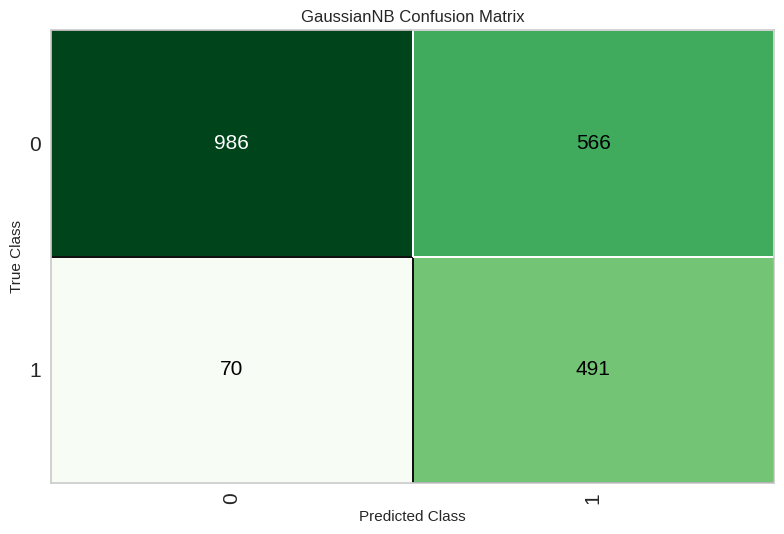

In [ ]:
# Analyse the Confusion Matrix of the best model
plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
# tune the best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7505,0.7555,0.4846,0.5294,0.5060,0.3396,0.3402
1,0.8134,0.7898,0.5692,0.6727,0.6167,0.4945,0.4975
2,0.7748,0.7433,0.5496,0.5806,0.5647,0.4130,0.4133
3,0.7546,0.7382,0.5649,0.5362,0.5502,0.3816,0.3818
4,0.7566,0.7699,0.5267,0.5433,0.5349,0.3701,0.3702
5,0.7627,0.7741,0.5802,0.5507,0.5651,0.4020,0.4023
6,0.7525,0.7777,0.5573,0.5328,0.5448,0.3750,0.3752
7,0.7830,0.8051,0.5954,0.5909,0.5932,0.4452,0.4452
8,0.7667,0.7565,0.4580,0.5769,0.5106,0.3602,0.3643


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


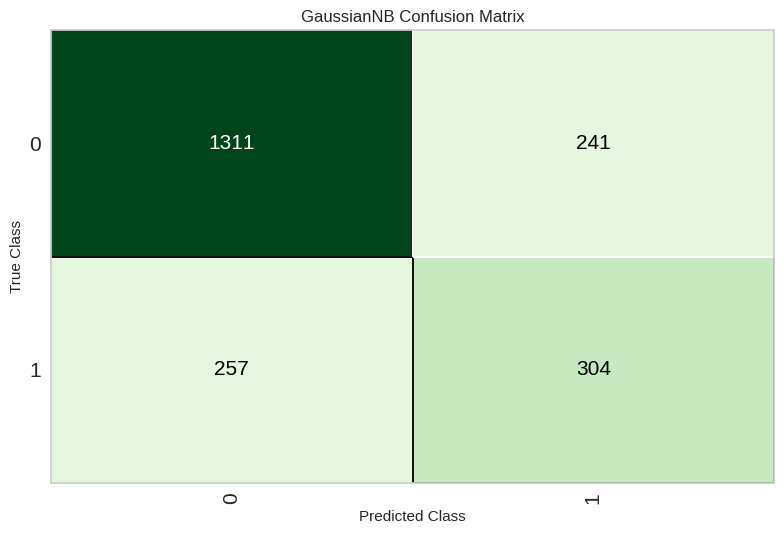

In [ ]:
# Analyse the Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')


In [ ]:
# create a custom function
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    fp = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([tp,fp])
# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                            Profit
Display Name                                                    Profit
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer                                   make_scorer(calculate_profit)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: profit, dtype: object

In [ ]:
# compare all models
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
nb,Naive Bayes,0.6811,0.8116,0.8394,0.4474,0.5832,0.3623,0.4099,303000.0000,0.3140
qda,Quadratic Discriminant Analysis,0.6826,0.8186,0.8242,0.4476,0.5792,0.3589,0.4038,297700.0000,0.5760
lda,Linear Discriminant Analysis,0.7959,0.8297,0.5420,0.6377,0.5849,0.4510,0.4543,242900.0000,0.3470
lr,Logistic Regression,0.8010,0.8376,0.5328,0.6556,0.5869,0.4578,0.4627,241800.0000,0.6400
ada,Ada Boost Classifier,0.8030,0.8382,0.5191,0.6689,0.5834,0.4572,0.4642,237400.0000,0.6060
lightgbm,Light Gradient Boosting Machine,0.7968,0.8274,0.5229,0.6465,0.5773,0.4456,0.4505,235800.0000,1.2440
gbc,Gradient Boosting Classifier,0.7998,0.8381,0.5092,0.6618,0.5748,0.4467,0.4538,231900.0000,1.3960
ridge,Ridge Classifier,0.8000,0.0000,0.5054,0.6631,0.5728,0.4454,0.4529,230500.0000,0.5590
xgboost,Extreme Gradient Boosting,0.7815,0.8099,0.5000,0.6092,0.5483,0.4062,0.4102,219300.0000,0.4870
rf,Random Forest Classifier,0.7878,0.8157,0.4832,0.6332,0.5473,0.4121,0.4190,215800.0000,1.0240


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

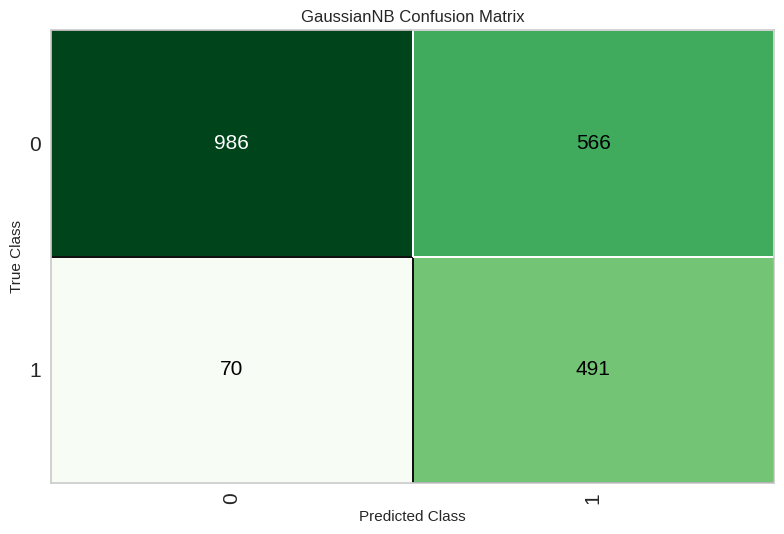

In [ ]:
# confusion matrix
plot_model(best_model, plot = 'confusion_matrix')